In [62]:
import pandas as pd
import sqlite3
import matplotlib
import ipywidgets
import matplotlib.pyplot as plt
import regex

# IMDb Data
Found on: https://datasets.imdbws.com/

Lisence: Subsets of IMDb data are available for access to customers for personal and non-commercial use. https://help.imdb.com/article/imdb/general-information/can-i-use-imdb-data-in-my-software/G5JTRESSHJBBHTGX?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&pf_rd_r=4T3EYTP8F7MDAN370387&pf_rd_s=center-1&pf_rd_t=60601&pf_rd_i=interfaces&ref_=fea_mn_lk1

- name.basics.tsv.gz – Contains the following information for names:
    - nconst (string) - alphanumeric unique identifier of the name/person
    - primaryName (string)– name by which the person is most often credited
    - birthYear – in YYYY format
    - deathYear – in YYYY format if applicable, else '\N'
    - primaryProfession (array of strings)– the top-3 professions of the person
    - knownForTitles (array of tconsts) – titles the person is known for
- title.basics.tsv.gz - Contains the following information for titles:
    - tconst (string) - alphanumeric unique identifier of the title
    - titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    - originalTitle (string) - original title, in the original language
    - isAdult (boolean) - 0: non-adult title; 1: adult title
    - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    - endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
    - runtimeMinutes – primary runtime of the title, in minutes
    - genres (string array) – includes up to three genres associated with the title
- title.principals.tsv.gz – Contains the principal cast/crew for titles
    - tconst (string) - alphanumeric unique identifier of the title
    - ordering (integer) – a number to uniquely identify rows for a given titleId
    - nconst (string) - alphanumeric unique identifier of the name/person
    - category (string) - the category of job that person was in
    - job (string) - the specific job title if applicable, else '\N'
    - characters (string) - the name of the character played if applicable, else '\N'
    
These files are essentially all of the IMDb data so the unzipped files are HUGE! Therefore, I included them in my .gitignore file.

In [4]:
!pwd

/Users/tzacks2/Desktop/GradSchool/Spring22/SNL_Final


In [5]:
principals = pd.read_csv('Imdb_data/title.principals.tsv',delimiter='\t')
basics = pd.read_csv('Imdb_data/title.basics.tsv',delimiter='\t')
imdb_names = pd.read_csv('Imdb_data/name.basics.tsv',delimiter='\t')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# SNL UIDs
- tt0715791
- tt0715791
- tt0971348
- tt10809086
* **tt0072562**
- tt1372614
- tt2173702

# SNL Archive Data
- Kaggle: https://www.kaggle.com/hhllcks/snldb
- GitHub: https://github.com/hhllcks/snldb
- SNL Archive: http://www.snlarchives.net/

In [6]:
actors = pd.read_csv('SNL_data/actors.csv')
appearances = pd.read_csv('SNL_data/appearances.csv')
casts = pd.read_csv('SNL_data/casts.csv')
characters = pd.read_csv('SNL_data/characters.csv')
episodes = pd.read_csv('SNL_data/episodes.csv')
hosts = pd.read_csv('SNL_data/hosts.csv')
impressions = pd.read_csv('SNL_data/impressions.csv')
seasons = pd.read_csv('SNL_data/seasons.csv')
sketches = pd.read_csv('SNL_data/sketches.csv')
tenure = pd.read_csv('SNL_data/tenure.csv')
titles = pd.read_csv('SNL_data/titles.csv')

In [7]:
actors #includes guests?

aid          url   type   gender
0           Kate McKinnon  /Cast/?KaMc   cast   female
1             Alex Moffat  /Cast/?AlMo   cast     male
2              Ego Nwodim  /Cast/?EgNw   cast  unknown
3              Chris Redd  /Cast/?ChRe   cast     male
4          Kenan Thompson  /Cast/?KeTh   cast     male
...                   ...          ...    ...      ...
2301  Jesse Dixon Singers  /Guests/?16  guest     male
2302       Connie Hawkins  /Guests/?21  guest   female
2303        Billy Preston   /Guests/?3  guest     male
2304            Janis Ian   /Guests/?2  guest   female
2305      Valri Bromfield   /Guests/?5  guest  unknown

[2306 rows x 4 columns]

In [8]:
cast_members = actors.loc[actors.type == 'cast']
cast_members #why so many?

aid          url  type   gender
0      Kate McKinnon  /Cast/?KaMc  cast   female
1        Alex Moffat  /Cast/?AlMo  cast     male
2         Ego Nwodim  /Cast/?EgNw  cast  unknown
3         Chris Redd  /Cast/?ChRe  cast     male
4     Kenan Thompson  /Cast/?KeTh  cast     male
...              ...          ...   ...      ...
2048   Peter Aykroyd  /Cast/?PeAy  cast     male
2049     Jane Curtin  /Cast/?JaCu  cast   female
2051  Laraine Newman  /Cast/?LaNe  cast   female
2054    Gilda Radner  /Cast/?GiRa  cast   female
2132      George Coe  /Cast/?GeCo  cast     male

[154 rows x 4 columns]

# Wikipedia SNL Cast Member Table
https://en.wikipedia.org/wiki/List_of_Saturday_Night_Live_cast_members
- converted to csv using: https://wikitable2csv.ggor.de/

In [9]:
wiki_table = pd.read_csv('wiki_cast.csv')

In [10]:
wiki_table

Performer   Time on SNL  No. of seasons  Repertory Player  \
0        Fred Armisen     2002–2013              11               NaN   
1    Aristotle Athari  2021–present               1               NaN   
2         Dan Aykroyd     1975–1979               4               NaN   
3       Peter Aykroyd          1980               1               NaN   
4      Morwenna Banks          1995               1               NaN   
..                ...           ...             ...               ...   
154      Casey Wilson     2008–2009               2               NaN   
155         Fred Wolf     1996–1996               2               NaN   
156        Bowen Yang  2019–present               3               NaN   
157    Sasheer Zamata     2014–2017               4               NaN   
158      Alan Zweibel          1980               1               NaN   

     Featured Player  Middle Group  "Weekend Update" Anchor  Hosted  \
0                NaN           NaN                      NaN     NaN   
1                NaN           NaN                      NaN     NaN   
2                NaN           NaN                      NaN     NaN   
3                NaN           NaN                      NaN     NaN   
4                NaN           NaN                      NaN     NaN   
..               ...           ...                      ...     ...   
154              NaN           NaN                      NaN     NaN   
155              NaN           NaN                      NaN     NaN   
156              NaN           NaN                      NaN     NaN   
157              NaN           NaN                      NaN     NaN   
158              NaN           NaN                      NaN     NaN   

     Best of...  Writer  
0           NaN     NaN  
1           NaN     NaN  
2           NaN     NaN  
3           NaN     NaN  
4           NaN     NaN  
..          ...     ...  
154         NaN     NaN  
155         NaN     NaN  
156         NaN     NaN  
157         NaN     NaN  
158         NaN     NaN  

[159 rows x 10 columns]

In [11]:
dropped_cols = ('Repertory Player','Featured Player','Middle Group','"Weekend Update" Anchor','Hosted','Best of...','Writer')
for i in dropped_cols:
    if i in wiki_table.columns:
        print(i)
        wiki_table = wiki_table.drop(columns = i, inplace=False)
        

Repertory Player
Featured Player
Middle Group
"Weekend Update" Anchor
Hosted
Writer


In [12]:
wiki_table # won't drop 'Best of...'

Performer   Time on SNL  No. of seasons  Best of...
0        Fred Armisen     2002–2013              11         NaN
1    Aristotle Athari  2021–present               1         NaN
2         Dan Aykroyd     1975–1979               4         NaN
3       Peter Aykroyd          1980               1         NaN
4      Morwenna Banks          1995               1         NaN
..                ...           ...             ...         ...
154      Casey Wilson     2008–2009               2         NaN
155         Fred Wolf     1996–1996               2         NaN
156        Bowen Yang  2019–present               3         NaN
157    Sasheer Zamata     2014–2017               4         NaN
158      Alan Zweibel          1980               1         NaN

[159 rows x 4 columns]

## Edited Table in Excel
I decided to copy and paste the Wikipedia page into Excel to format it. The 6 columns from the original table that included checkmarks didn't have any data coming through so I went through the table and added "Yes anywhere there was a checkmark. I then imported the resulting csv file and used the df.fillna() function to convert the NaN values to "No" values. I also noticed that there were actors who left for a period and then came back, adding an additional row to the data without a name attached. In excel, I decided to seperate the different periods by semicolon instead of adding a new row.

In [13]:
wiki_cast_excel = pd.read_csv('wiki_cast_excel.csv')

In [14]:
wiki_cast_excel.iloc[29]

Performer                  Brian Doyle-Murray
Time on SNL                    1980;1981–1982
No. of seasons                              2
Repertory Player                          Yes
Featured Player                           Yes
Middle Group                              NaN
"Weekend Update" Anchor                   Yes
Hosted                                    NaN
Writer                                    Yes
Name: 29, dtype: object

In [15]:
wiki_cast = wiki_cast_excel.fillna('No')
wiki_cast

Performer   Time on SNL  No. of seasons Repertory Player  \
0        Fred Armisen     2002–2013              11              Yes   
1    Aristotle Athari  2021–present               1               No   
2         Dan Aykroyd     1975–1979               4              Yes   
3       Peter Aykroyd          1980               1               No   
4      Morwenna Banks          1995               1              Yes   
..                ...           ...             ...              ...   
154      Casey Wilson     2008–2009               2               No   
155         Fred Wolf     1996–1996               2               No   
156        Bowen Yang  2019–present               3              Yes   
157    Sasheer Zamata     2014–2017               4              Yes   
158      Alan Zweibel          1980               1               No   

    Featured Player Middle Group "Weekend Update" Anchor Hosted Writer  
0               Yes           No                      No    Yes     No  
1               Yes           No                      No     No     No  
2                No           No                     Yes    Yes    Yes  
3               Yes           No                      No     No    Yes  
4                No           No                      No     No     No  
..              ...          ...                     ...    ...    ...  
154             Yes           No                      No     No     No  
155             Yes           No                      No     No    Yes  
156             Yes           No                      No     No    Yes  
157             Yes           No                      No     No     No  
158             Yes           No                      No     No    Yes  

[159 rows x 9 columns]

Text(0, 0.5, 'No. of Seasons')

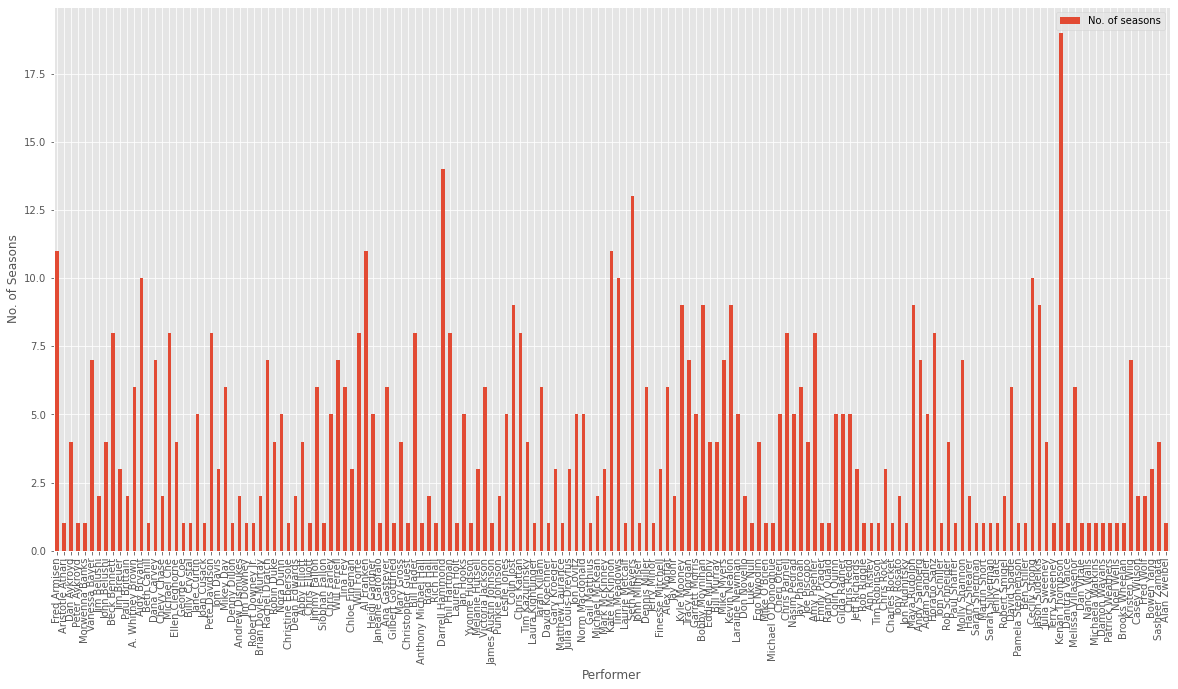

In [16]:
plt.style.use('ggplot')
ax = wiki_cast.plot(x= "Performer",y="No. of seasons", figsize = (20,10), kind = 'bar')
ax.set_ylabel('No. of Seasons')

In [17]:
# def cross_imdb_wiki():
#     for i in names['primaryName']:
#         print(i)
#         if i in wiki_cast['Performer']:
#             cross_imdb_wiki_list.append(i)
#     return cross_imdb_wiki_list

In [18]:
# cross_imdb_wiki()

In [19]:
imdb_names_df = imdb_names
imdb_names_df

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
11554305  nm9993714   Romeo del Rosario        \N        \N   
11554306  nm9993716       Essias Loberg        \N        \N   
11554307  nm9993717  Harikrishnan Rajan        \N        \N   
11554308  nm9993718         Aayush Nair        \N        \N   
11554309  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtrack,music_department   
3                     actor,soundtrack,writer   
4                       writer,director,actor   
...                                       ...   
11554305  animation_department,art_department   
11554306                                  NaN   
11554307                      cinematographer   
11554308                      cinematographer   
11554309                                  NaN   

                                   knownForTitles  
0         tt0050419,tt0053137,tt0031983,tt0072308  
1         tt0071877,tt0037382,tt0117057,tt0038355  
2         tt0054452,tt0056404,tt0057345,tt0049189  
3         tt0078723,tt0072562,tt0077975,tt0080455  
4         tt0069467,tt0083922,tt0060827,tt0050986  
...                                           ...  
11554305          tt14069590,tt11657662,tt2455546  
11554306                                       \N  
11554307                                tt8736744  
11554308                                       \N  
11554309                                       \N  

[11554310 rows x 6 columns]

In [20]:
imdb_name_list = imdb_names_df.values.tolist()
imdb_name_list #with repeats, ALL NAMES

[['nm0000001',
  'Fred Astaire',
  '1899',
  '1987',
  'soundtrack,actor,miscellaneous',
  'tt0050419,tt0053137,tt0031983,tt0072308'],
 ['nm0000002',
  'Lauren Bacall',
  '1924',
  '2014',
  'actress,soundtrack',
  'tt0071877,tt0037382,tt0117057,tt0038355'],
 ['nm0000003',
  'Brigitte Bardot',
  '1934',
  '\\N',
  'actress,soundtrack,music_department',
  'tt0054452,tt0056404,tt0057345,tt0049189'],
 ['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000005',
  'Ingmar Bergman',
  '1918',
  '2007',
  'writer,director,actor',
  'tt0069467,tt0083922,tt0060827,tt0050986'],
 ['nm0000006',
  'Ingrid Bergman',
  '1915',
  '1982',
  'actress,soundtrack,producer',
  'tt0077711,tt0038109,tt0034583,tt0036855'],
 ['nm0000007',
  'Humphrey Bogart',
  '1899',
  '1957',
  'actor,soundtrack,producer',
  'tt0034583,tt0037382,tt0042593,tt0043265'],
 ['nm0000008',
  'Marlon Brando',
  '1924',
  '2004',
  'actor,soundtrack,di

In [21]:
imdb_names_df.columns.tolist()

['nconst',
 'primaryName',
 'birthYear',
 'deathYear',
 'primaryProfession',
 'knownForTitles']

In [25]:
cross_imdb_wiki_list = []
for person in imdb_name_list:
    if person[1] in wiki_cast['Performer'].values:
        cross_imdb_wiki_list.append(person)

In [26]:
cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
len(cross_name_list) # <- Missing 2 cast members

157

In [ ]:
# MAKING CSV FOR CROSS IMDb LIST
# import csv
# with open('imdb_wiki_filter.csv', 'w', encoding = 'utf-8') as outfile:
#     csvout = csv.writer(outfile)
#     csvout.writerow(names.columns.tolist())
#     csvout.writerows(cross_imdb_wiki_list)

In [27]:
from collections import Counter

Counter([r[1] for r in cross_imdb_wiki_list]).most_common(10)

[('Tom Davis', 56),
 ("Mike O'Brien", 56),
 ('Bill Murray', 35),
 ('Tim Robinson', 32),
 ('Leslie Jones', 26),
 ('Chris Elliott', 24),
 ('Mike Myers', 23),
 ('Jeff Richards', 23),
 ('Dennis Miller', 21),
 ('Victoria Jackson', 18)]

In [28]:
cross_imdb_wiki_list

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [29]:
def check_names(name):
    cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
    result = False
    
    if name in cross_name_list:
        result = True
    return result

In [30]:
def check_creds(works):
    SNL_IDs = ['tt0715791', 'tt0715791', 'tt0971348', 'tt10809086', 'tt0072562', 'tt1372614', 'tt2173702']
    result = False
    for work in works.split(','):
        if work in SNL_IDs:
            result = True
    return result

In [31]:
check_creds('tt0460619,tt0157246,tt4116284,tt8324422')

False

In [32]:
SNL_name_check = [r for r in cross_imdb_wiki_list if check_names(r[1])]
(SNL_name_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [33]:
SNL_cred_check = [r for r in cross_imdb_wiki_list if check_creds(r[5])]
(SNL_cred_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000902',
  'Jim Belushi',
  '1954',
  '\\N',
  'actor,music_department,producer',
  'tt0097637,tt0072562,tt0117468,tt0095963'],
 ['nm0001022',
  'Dana Carvey',
  '1955',
  '\\N',
  'actor,soundtrack,writer',
  'tt0072562,tt0108525,tt0105793,tt0295427'],
 ['nm0005265',
  'Kevin Nealon',
  '1953',
  '\\N',
  'actor,writer,soundtrack',
  'tt0072562,tt0116483,tt0439100,tt0120888'],
 ['nm0035488',
  'Fred Armisen',
  '1966',
  '\\N',
  'music_department,actor,writer',
  'tt0357413,tt1282140,tt0072562,tt1780441'],
 ['nm0112944',
  'A. Whitney Brown',
  '1952',
  '\\N',
  'writer,actor',
  'tt0096708,tt0072562,tt0166039,tt1094991'],
 ['nm0128639',
  'Beth Cahill',
  '\\N',
  '\\N',
  'actress,costume_designer,miscellaneous',
  'tt0155764,tt0262411,tt0164930,tt0072562'],
 ['nm0205569',
  'Tom Davis',
  '1952',
  '2012',
  'writer,actor,producer',
  'tt0086465,tt

In [37]:
SNL_df = pd.DataFrame(SNL_cred_check, columns = imdb_names.columns.tolist()).set_index('primaryName')

In [38]:
SNL_df

nconst birthYear deathYear  \
primaryName                                      
John Belushi     nm0000004      1949      1982   
Jim Belushi      nm0000902      1954        \N   
Dana Carvey      nm0001022      1955        \N   
Kevin Nealon     nm0005265      1953        \N   
Fred Armisen     nm0035488      1966        \N   
...                    ...       ...       ...   
Aidy Bryant      nm5262775      1987        \N   
Chris Redd       nm5412083        \N        \N   
Fred Wolf        nm7440291        \N        \N   
Lauren Holt      nm7576527      1991        \N   
Andrew Dismukes  nm8608160        \N        \N   

                               primaryProfession  \
primaryName                                        
John Belushi             actor,soundtrack,writer   
Jim Belushi      actor,music_department,producer   
Dana Carvey              actor,soundtrack,writer   
Kevin Nealon             actor,writer,soundtrack   
Fred Armisen       music_department,actor,writer   
...                                          ...   
Aidy Bryant            actress,writer,soundtrack   
Chris Redd               actor,writer,soundtrack   
Fred Wolf                                  actor   
Lauren Holt                              actress   
Andrew Dismukes                     writer,actor   

                                            knownForTitles  
primaryName                                                 
John Belushi       tt0078723,tt0072562,tt0077975,tt0080455  
Jim Belushi        tt0097637,tt0072562,tt0117468,tt0095963  
Dana Carvey        tt0072562,tt0108525,tt0105793,tt0295427  
Kevin Nealon       tt0072562,tt0116483,tt0439100,tt0120888  
Fred Armisen       tt0357413,tt1282140,tt0072562,tt1780441  
...                                                    ...  
Aidy Bryant       tt5462602,tt11092142,tt8962130,tt0072562  
Chris Redd         tt3960412,tt5884792,tt7286456,tt0072562  
Fred Wolf                   tt3910602,tt10222674,tt0072562  
Lauren Holt        tt8394996,tt8937092,tt0072562,tt7546290  
Andrew Dismukes  tt14508698,tt0072562,tt13858722,tt6279022  

[61 rows x 5 columns]

In [39]:
wiki_cast = wiki_cast.set_index('Performer')

In [40]:
imdb_wiki_table = pd.concat([SNL_df, wiki_cast], axis=1, join="outer")

# IMDb Wiki Table concat
At this point, I have joined the Wiki and IMDb name tables together based on the cast member name. The joined table now has the unique cast member ID (nconst), birth and death years (where applicable), primary profession (actor dshould be in most, if not all of the cast professsion lists), known for titles (IMDb unique IDs for projects), Time on SNL (Years), No. of seasons, and whether or not they cast member was a: Repertory Player, Featured Player, Middle Group, "Weekend Update" Anchor, Host (after leaving the cast), and/or Writer.

For some reason, there are some cast members (Kristen Wiig, Bowen Yang, Sasheer Zamata, etc.) whose names aren't getting parsed from the IMDb data so I'll need to look into that further.

In [41]:
imdb_wiki_table

nconst birthYear deathYear  \
John Belushi      nm0000004      1949      1982   
Jim Belushi       nm0000902      1954        \N   
Dana Carvey       nm0001022      1955        \N   
Kevin Nealon      nm0005265      1953        \N   
Fred Armisen      nm0035488      1966        \N   
...                     ...       ...       ...   
Patrick Weathers        NaN       NaN       NaN   
Kristen Wiig            NaN       NaN       NaN   
Casey Wilson            NaN       NaN       NaN   
Bowen Yang              NaN       NaN       NaN   
Sasheer Zamata          NaN       NaN       NaN   

                                primaryProfession  \
John Belushi              actor,soundtrack,writer   
Jim Belushi       actor,music_department,producer   
Dana Carvey               actor,soundtrack,writer   
Kevin Nealon              actor,writer,soundtrack   
Fred Armisen        music_department,actor,writer   
...                                           ...   
Patrick Weathers                              NaN   
Kristen Wiig                                  NaN   
Casey Wilson                                  NaN   
Bowen Yang                                    NaN   
Sasheer Zamata                                NaN   

                                           knownForTitles   Time on SNL  \
John Belushi      tt0078723,tt0072562,tt0077975,tt0080455     1975–1979   
Jim Belushi       tt0097637,tt0072562,tt0117468,tt0095963     1983–1985   
Dana Carvey       tt0072562,tt0108525,tt0105793,tt0295427     1986–1993   
Kevin Nealon      tt0072562,tt0116483,tt0439100,tt0120888     1986–1995   
Fred Armisen      tt0357413,tt1282140,tt0072562,tt1780441     2002–2013   
...                                                   ...           ...   
Patrick Weathers                                      NaN     1980–1981   
Kristen Wiig                                          NaN     2005–2012   
Casey Wilson                                          NaN     2008–2009   
Bowen Yang                                            NaN  2019–present   
Sasheer Zamata                                        NaN     2014–2017   

                  No. of seasons Repertory Player Featured Player  \
John Belushi                   4              Yes              No   
Jim Belushi                    2              Yes              No   
Dana Carvey                    7              Yes              No   
Kevin Nealon                   9              Yes             Yes   
Fred Armisen                  11              Yes             Yes   
...                          ...              ...             ...   
Patrick Weathers               1               No             Yes   
Kristen Wiig                   7              Yes             Yes   
Casey Wilson                   2               No             Yes   
Bowen Yang                     3              Yes             Yes   
Sasheer Zamata                 4              Yes             Yes   

                 Middle Group "Weekend Update" Anchor Hosted Writer  
John Belushi               No                      No     No    Yes  
Jim Belushi                No                      No     No    Yes  
Dana Carvey                No                      No    Yes    Yes  
Kevin Nealon               No                     Yes     No    Yes  
Fred Armisen               No                      No    Yes     No  
...                       ...                     ...    ...    ...  
Patrick Weathers           No                      No     No     No  
Kristen Wiig               No                      No    Yes     No  
Casey Wilson               No                      No     No     No  
Bowen Yang                 No                      No     No    Yes  
Sasheer Zamata             No                      No     No     No  

[159 rows x 13 columns]

I am now attempting to create a dictionary of all the cast members and their IMDb "Known For Titles" to create a heatmap to show overlaps. Hopefully that will work but I am still in the process of figuring out how to do this. My plan is the following:
1. Use set() to get unique names
2. Intialize a dictionary where name is key and value is empty list `(John Belushi:[])` (result.index) LEN==159 values:empty lists
3. Loop over imdb data and extract primaryName and use primaryName `human[name].append(row)` where row in imdb
    - for row in imdb grab primary name -> name variable
    - `humans[name] += knownForTitles.split(‘,’)`
    - for human, knownfor in humans.items():
    - newhumans[human] = set(knownfor)
    - humans = unique humans with all known for items

In [42]:
name_titles_dict = {}
keys = cross_name_list
for name in keys:
    name_titles_dict[name] = []

name_titles_dict

{'Denny Dillon': [],
 'Matthew Laurance': [],
 'Dana Carvey': [],
 'Gilda Radner': [],
 'Tom Schiller': [],
 'Chris Elliott': [],
 'Yvonne Hudson': [],
 'Cheri Oteri': [],
 'Beck Bennett': [],
 'Vanessa Bayer': [],
 'Tim Kazurinsky': [],
 'Paul Shaffer': [],
 'Jenny Slate': [],
 'Eddie Murphy': [],
 'Chris Redd': [],
 'Will Forte': [],
 'Cecily Strong': [],
 'Mike Myers': [],
 'Don Novello': [],
 'Maya Rudolph': [],
 'Aidy Bryant': [],
 'Christine Ebersole': [],
 'Molly Shannon': [],
 'Chevy Chase': [],
 'Colin Quinn': [],
 "Michael O'Donoghue": [],
 'Jay Mohr': [],
 'Tim Meadows': [],
 'Kristen Wiig': [],
 'Paul Brittain': [],
 'Victoria Jackson': [],
 'Gilbert Gottfried': [],
 'Ego Nwodim': [],
 'Jimmy Fallon': [],
 'Robert Downey Jr.': [],
 'Jerry Minor': [],
 'Janeane Garofalo': [],
 'Michael Che': [],
 'Jane Curtin': [],
 'Harry Shearer': [],
 'Melanie Hutsell': [],
 'Ben Stiller': [],
 'Patrick Weathers': [],
 'John Belushi': [],
 'Bill Murray': [],
 'Gary Kroeger': [],
 'Chris P

In [44]:
names_title_dict = {item[1]:item[5].split(',') for item in SNL_name_check}
names_title_dict

{'John Belushi': ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
 'Dan Aykroyd': ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
 'Bill Murray': ['tt5156614'],
 'Mike Myers': ['\\N'],
 'Chevy Chase': ['tt0085995', 'tt0097958', 'tt0080487', 'tt0092086'],
 'Billy Crystal': ['tt0101587', 'tt0098635', 'tt0113097', 'tt0122933'],
 'Joan Cusack': ['tt0119229', 'tt1659337', 'tt0119360', 'tt0096463'],
 'Robert Downey Jr.': ['tt1300854', 'tt0371746', 'tt4154796', 'tt0988045'],
 'Chris Farley': ['\\N'],
 'Janeane Garofalo': ['tt0382932', 'tt0132347', 'tt0117979', 'tt0243655'],
 'Julia Louis-Dreyfus': ['tt0462128', 'tt1759761', 'tt2390361', 'tt0098904'],
 'Eddie Murphy': ['tt0492509'],
 'Jim Belushi': ['tt0097637', 'tt0072562', 'tt0117468', 'tt0095963'],
 'Dana Carvey': ['tt0072562', 'tt0108525', 'tt0105793', 'tt0295427'],
 'Adam Sandler': ['tt13689618', 'tt10428498', 'tt0068120', 'tt12116598'],
 'Christopher Guest': ['tt4334642', 'tt1024855'],
 'Anthony Michael Hall': ['tt0468569', 't

In [61]:
for i in SNL_name_check:
    unique_titles = []
    if i[1]== 'Bill Murray':
        print(set(i))
        pattern = r/''


{'Bill Murray', '\\N', 'tt1748122,tt0128445,tt0362270,tt0335266', '1950', 'nm0000195', 'actor,soundtrack,writer'}
{'Bill Murray', '\\N', 'tt0097132', 'miscellaneous', 'nm0614853'}
{'nm10343807', 'Bill Murray', '\\N', 'tt6384192,tt13998382', 'actor'}
{'Bill Murray', '\\N', 'camera_department', 'nm1162741', 'tt0288154,tt0189500'}
{nan, 'Bill Murray', '\\N', 'nm12931864'}
{'Bill Murray', '\\N', 'actor', 'tt0351810', 'nm1386521'}
{'Bill Murray', '\\N', 'cinematographer', 'tt0448004', 'nm1831668'}
{'Bill Murray', '\\N', 'nm1907457', 'tt0457251,tt0961721', 'actor,writer'}
{'Bill Murray', '\\N', 'tt0122145', 'nm1981812', 'actor'}
{nan, 'Bill Murray', '\\N', 'tt0281438', 'nm2018971'}
{'nm2966932', 'Bill Murray', '\\N', 'editor,editorial_department', 'tt1732762,tt1210095'}
{'Bill Murray', '\\N', 'tt1490534', 'nm3578809', 'producer'}
{nan, 'Bill Murray', '1986', 'tt1687207,tt1600694,tt1538443', 'nm3673242', '1908'}
{nan, 'Bill Murray', '\\N', 'nm3890281'}
{'Bill Murray', '\\N', 'tt1810727', 'nm4

`import pygraphviz as pgv

G = pgv.AGraph(edges,
               strict=True,
               directed=True,
               rankdir="RL",
               ranksep="0.25",
               ordering="in")

G.layout('dot')

G.draw('curr.png')

G.draw('curr.svg')`